In [ ]:
# prompt: mount colab, force remount
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('/content/hist.csv')

data.columns = [
    'week_number',       # Column 1
    'subscriber_id',     # Column 2
    'user_category',     # Column 3
    'state_id',          # Column 4
    'gender',            # Column 5
    'campaign_id',       # Column 6
    'response'           # Column 7
]


# Feature - 1; Feature Name: week_number
# Feature Desc: Week number of the campaign delivery.
data['week_number'] = data['week_number']

# Feature - 2; Feature Name: subscriber_id
# Feature Desc: Unique identifier for the subscriber.
data['subscriber_id'] = data['subscriber_id']

# Feature - 3; Feature Name: user_category
# Feature Desc: Category for the user based on several demographic criteria.
data['user_category'] = data['user_category']

# Feature - 4; Feature Name: state_id
# Feature Desc: Code that identifies the state where the subscriber is located.
data['state_id'] = data['state_id']

# Feature - 5; Feature Name: gender
# Feature Desc: Gender of the subscriber.
data['gender'] = data['gender']

# Feature - 6; Feature Name: campaign_id
# Feature Desc: Unique identifier for the campaign.
data['campaign_id'] = data['campaign_id']

# Feature - 7; Feature Name: response
# Feature Desc: Identifies if a user responded to the campaign.
data['response'] = data['response']

# Feature - 8; Feature Name: days_since_last_campaign
# Feature Desc: Days since the last campaign was sent to the subscriber. Calculated using the difference between the current and the previous week_number.
data['days_since_last_campaign'] = data.groupby('subscriber_id')['week_number'].diff().fillna(0) * 7

# Feature - 9; Feature Name: weeks_since_last_campaign
# Feature Desc: Weeks since the last campaign was sent to the subscriber. Calculated using the difference between the current and the previous week_number.
data['weeks_since_last_campaign'] = data.groupby('subscriber_id')['week_number'].diff().fillna(0)

# Feature - 10; Feature Name: days_since_first_campaign
# Feature Desc: Days since the first campaign was sent to the subscriber. Calculated using the difference between the current and the minimum week_number for each subscriber.
data['days_since_first_campaign'] = (data['week_number'] - data.groupby('subscriber_id')['week_number'].transform('min')) * 7

# Feature - 11; Feature Name: week_of_month
# Feature Desc: Week of the month the campaign was delivered. Calculated using the week_number.
data['week_of_month'] = (data['week_number'] - 1) % 4 + 1

# Feature - 12; Feature Name: is_weekend_campaign
# Feature Desc: Boolean indicating if the campaign was delivered on a weekend. Calculated using the modulo operation on week_number.
data['is_weekend_campaign'] = data['week_number'] % 7 >= 5

# Feature - 13; Feature Name: user_category_A
# Feature Desc: One-hot encoding for user category A. Calculated by checking if user_category is 'A'.
data['user_category_A'] = (data['user_category'] == 'A').astype(int)

# Feature - 14; Feature Name: user_category_B
# Feature Desc: One-hot encoding for user category B. Calculated by checking if user_category is 'B'.
data['user_category_B'] = (data['user_category'] == 'B').astype(int)

# Feature - 15; Feature Name: user_category_C
# Feature Desc: One-hot encoding for user category C. Calculated by checking if user_category is 'C'.
data['user_category_C'] = (data['user_category'] == 'C').astype(int)

# Feature - 16; Feature Name: user_category_D
# Feature Desc: One-hot encoding for user category D. Calculated by checking if user_category is 'D'.
data['user_category_D'] = (data['user_category'] == 'D').astype(int)

# Feature - 17; Feature Name: gender_M
# Feature Desc: One-hot encoding for male gender. Calculated by checking if gender is 'M'.
data['gender_M'] = (data['gender'] == 'M').astype(int)

# Feature - 18; Feature Name: gender_F
# Feature Desc: One-hot encoding for female gender. Calculated by checking if gender is 'F'.
data['gender_F'] = (data['gender'] == 'F').astype(int)

# Feature - 19; Feature Name: user_category_campaign_interaction
# Feature Desc: Interaction feature between user category and campaign. Calculated by concatenating user_category and campaign_id.
data['user_category_campaign_interaction'] = data['user_category'].astype(str) + '_' + data['campaign_id'].astype(str)

# Feature - 20; Feature Name: state_campaign_interaction
# Feature Desc: Interaction feature between state and campaign. Calculated by concatenating state_id and campaign_id.
data['state_campaign_interaction'] = data['state_id'].astype(str) + '_' + data['campaign_id'].astype(str)

# Feature - 21; Feature Name: gender_campaign_interaction
# Feature Desc: Interaction feature between gender and campaign. Calculated by concatenating gender and campaign_id.
data['gender_campaign_interaction'] = data['gender'].astype(str) + '_' + data['campaign_id'].astype(str)

# Feature - 22; Feature Name: total_campaigns_received
# Feature Desc: Total number of campaigns received by the subscriber. Calculated using the cumulative count of campaigns for each subscriber.
data['total_campaigns_received'] = data.groupby('subscriber_id').cumcount()

# Feature - 23; Feature Name: total_responses_received
# Feature Desc: Total number of responses given by the subscriber. Calculated using the cumulative sum of responses for each subscriber, shifted to exclude the current response.
data['total_responses_received'] = data.groupby('subscriber_id')['response'].cumsum().shift().fillna(0)

# Feature - 24; Feature Name: average_response_rate
# Feature Desc: Average response rate of the subscriber. Calculated as the total_responses_received divided by the total_campaigns_received.
data['average_response_rate'] = (data['total_responses_received'] / data['total_campaigns_received']).fillna(0)

# Feature - 25; Feature Name: is_young_adult
# Feature Desc: Indicates if the user is categorized as a young adult. Calculated by checking if user_category is 'A'.
data['is_young_adult'] = (data['user_category'] == 'A').astype(int)


# Feature - 26; Feature Name: is_middle_aged
# Feature Desc: Indicates if the user is categorized as middle-aged. Calculated by checking if user_category is 'B'.
data['is_middle_aged'] = (data['user_category'] == 'B').astype(int)

# Feature - 27; Feature Name: is_senior
# Feature Desc: Indicates if the user is categorized as a senior. Calculated by checking if user_category is 'C'.
data['is_senior'] = (data['user_category'] == 'C').astype(int)

# Feature - 28; Feature Name: average_response_rate_state
# Feature Desc: Average response rate for the state. Calculated using the expanding mean of responses for each state, shifted to exclude the current response.
data['average_response_rate_state'] = data.groupby('state_id')['response'].transform(lambda x: x.expanding().mean().shift().fillna(0))

# Feature - 29; Feature Name: total_campaigns_received_state
# Feature Desc: Total number of campaigns received by users in the state. Calculated using the cumulative count of campaigns for each state.
data['total_campaigns_received_state'] = data.groupby('state_id').cumcount() + 1

# Feature - 30; Feature Name: total_responses_received_state
# Feature Desc: Total number of responses given by users in the state. Calculated using the cumulative sum of responses for each state, shifted to exclude the current response.
data['total_responses_received_state'] = data.groupby('state_id')['response'].transform(lambda x: x.cumsum().shift().fillna(0))

# Feature - 31; Feature Name: average_response_rate_user
# Feature Desc: Average response rate for the user. Calculated using the expanding mean of responses for each subscriber, shifted to exclude the current response.
data['average_response_rate_user'] = data.groupby('subscriber_id')['response'].transform(lambda x: x.expanding().mean().shift().fillna(0))

# Feature - 32; Feature Name: total_campaigns_received_user
# Feature Desc: Total number of campaigns received by the user. Calculated using the cumulative count of campaigns for each subscriber.
data['total_campaigns_received_user'] = data.groupby('subscriber_id').cumcount() + 1

# Feature - 33; Feature Name: total_responses_received_user
# Feature Desc: Total number of responses given by the user. Calculated using the cumulative sum of responses for each subscriber, shifted to exclude the current response.
data['total_responses_received_user'] = data.groupby('subscriber_id')['response'].transform(lambda x: x.cumsum().shift().fillna(0))

# Feature - 34; Feature Name: campaign_response_rate
# Feature Desc: Response rate for each campaign. Calculated using the expanding mean of responses for each campaign, shifted to exclude the current response.
data['campaign_response_rate'] = data.groupby('campaign_id')['response'].transform(lambda x: x.expanding().mean().shift().fillna(0))

# Feature - 35; Feature Name: campaign_total_responses
# Feature Desc: Total responses received for each campaign. Calculated using the cumulative sum of responses for each campaign, shifted to exclude the current response.
data['campaign_total_responses'] = data.groupby('campaign_id')['response'].transform(lambda x: x.cumsum().shift().fillna(0))

# Feature - 36; Feature Name: user_state
# Feature Desc: Combination of user category and state. Calculated by concatenating user_category and state_id.
data['user_state'] = data['user_category'].astype(str) + '_' + data['state_id'].astype(str)

# Feature - 37; Feature Name: user_gender
# Feature Desc: Combination of user category and gender. Calculated by concatenating user_category and gender.
data['user_gender'] = data['user_category'].astype(str) + '_' + data['gender'].astype(str)

# Feature - 38; Feature Name: state_gender
# Feature Desc: Combination of state and gender. Calculated by concatenating state_id and gender.
data['state_gender'] = data['state_id'].astype(str) + '_' + data['gender'].astype(str)

# Feature - 39; Feature Name: user_gender_response_rate
# Feature Desc: Average response rate for the combination of user category and gender. Calculated using the expanding mean of responses, shifted to exclude the current response.
data['user_gender_response_rate'] = data.groupby('user_gender')['response'].transform(lambda x: x.expanding().mean().shift().fillna(0))

# Feature - 40; Feature Name: state_gender_response_rate
# Feature Desc: Average response rate for the combination of state and gender. Calculated using the expanding mean of responses, shifted to exclude the current response.
data['state_gender_response_rate'] = data.groupby('state_gender')['response'].transform(lambda x: x.expanding().mean().shift().fillna(0))

# Feature - 41; Feature Name: user_state_response_rate
# Feature Desc: Average response rate for the combination of user category and state. Calculated using the expanding mean of responses, shifted to exclude the current response.
data['user_state_response_rate'] = data.groupby('user_state')['response'].transform(lambda x: x.expanding().mean().shift().fillna(0))

# Feature - 42; Feature Name: campaign_user_category_response_rate
# Feature Desc: Average response rate for the combination of campaign and user category. Calculated using the expanding mean of responses, shifted to exclude the current response.
data['campaign_user_category_response_rate'] = data.groupby(['campaign_id', 'user_category'])['response'].transform(lambda x: x.expanding().mean().shift().fillna(0))

# Feature - 43; Feature Name: campaign_state_response_rate
# Feature Desc: Average response rate for the combination of campaign and state. Calculated using the expanding mean of responses, shifted to exclude the current response.
data['campaign_state_response_rate'] = data.groupby(['campaign_id', 'state_id'])['response'].transform(lambda x: x.expanding().mean().shift().fillna(0))

# Feature - 44; Feature Name: campaign_gender_response_rate
# Feature Desc: Average response rate for the combination of campaign and gender. Calculated using the expanding mean of responses, shifted to exclude the current response.
data['campaign_gender_response_rate'] = data.groupby(['campaign_id', 'gender'])['response'].transform(lambda x: x.expanding().mean().shift().fillna(0))

# Feature - 45; Feature Name: subscriber_campaign_count
# Feature Desc: Number of campaigns each subscriber has received. Calculated using the cumulative count of campaigns for each subscriber.
data['subscriber_campaign_count'] = data.groupby('subscriber_id').cumcount() + 1

# Feature - 46; Feature Name: response_rate_user_campaign
# Feature Desc: Response rate for each user and campaign combination. Calculated using the expanding mean of responses, shifted to exclude the current response.
data['response_rate_user_campaign'] = data.groupby(['subscriber_id', 'campaign_id'])['response'].transform(lambda x: x.expanding().mean().shift().fillna(0))

# Feature - 47; Feature Name: cumulative_response_user
# Feature Desc: Cumulative responses received by each user. Calculated using the cumulative sum of responses for each subscriber, shifted to exclude the current response.
data['cumulative_response_user'] = data.groupby('subscriber_id')['response'].transform(lambda x: x.cumsum().shift().fillna(0))

# Feature - 48; Feature Name: campaign_week_response_rate
# Feature Desc: Average response rate for each campaign week. Calculated using the expanding mean of responses, shifted to exclude the current response.
data['campaign_week_response_rate'] = data.groupby('week_number')['response'].transform(lambda x: x.expanding().mean().shift().fillna(0))

# Feature - 49; Feature Name: user_category_week_response_rate
# Feature Desc: Average response rate for each user category per week. Calculated using the expanding mean of responses, shifted to exclude the current response.
data['user_category_week_response_rate'] = data.groupby(['user_category', 'week_number'])['response'].transform(lambda x: x.expanding().mean().shift().fillna(0))

# Feature - 50; Feature Name: state_week_response_rate
# Feature Desc: Average response rate for each state per week. Calculated using the expanding mean of responses, shifted to exclude the current response.
data['state_week_response_rate'] = data.groupby(['state_id', 'week_number'])['response'].transform(lambda x: x.expanding().mean().shift().fillna(0))

# Feature - 51; Feature Name: avg_response_rate_user_state
# Feature Desc: Average response rate for the combination of user category and state, using only past data.
data['avg_response_rate_user_state'] = data.groupby(['user_category', 'state_id'])['response'].transform(lambda x: x.expanding().mean().shift().fillna(0))

# Feature - 52; Feature Name: avg_response_rate_user_gender
# Feature Desc: Average response rate for the combination of user category and gender, using only past data.
data['avg_response_rate_user_gender'] = data.groupby(['user_category', 'gender'])['response'].transform(lambda x: x.expanding().mean().shift().fillna(0))

# Feature - 53; Feature Name: avg_response_rate_state_gender
# Feature Desc: Average response rate for the combination of state and gender, using only past data.
data['avg_response_rate_state_gender'] = data.groupby(['state_id', 'gender'])['response'].transform(lambda x: x.expanding().mean().shift().fillna(0))

# Feature - 54; Feature Name: response_rate_campaign_user_state
# Feature Desc: Response rate for each campaign and user state combination, using only past data.
data['response_rate_campaign_user_state'] = data.groupby(['campaign_id', 'user_state'])['response'].transform(lambda x: x.expanding().mean().shift().fillna(0))

# Feature - 55; Feature Name: response_rate_campaign_user_gender
# Feature Desc: Response rate for each campaign and user gender combination, using only past data.
data['response_rate_campaign_user_gender'] = data.groupby(['campaign_id', 'user_gender'])['response'].transform(lambda x: x.expanding().mean().shift().fillna(0))

# Feature - 56; Feature Name: total_campaigns_received_user_state
# Feature Desc: Total number of campaigns received by users in each user category and state combination, using only past data.
data['total_campaigns_received_user_state'] = data.groupby(['user_category', 'state_id']).cumcount() + 1

# Feature - 57; Feature Name: total_responses_received_user_state
# Feature Desc: Total number of responses given by users in each user category and state combination, using only past data.
data['total_responses_received_user_state'] = data.groupby(['user_category', 'state_id'])['response'].transform(lambda x: x.cumsum().shift().fillna(0))

# Feature - 58; Feature Name: total_campaigns_received_user_gender
# Feature Desc: Total number of campaigns received by users in each user category and gender combination, using only past data.
data['total_campaigns_received_user_gender'] = data.groupby(['user_category', 'gender']).cumcount() + 1

# Feature - 59; Feature Name: total_responses_received_user_gender
# Feature Desc: Total number of responses given by users in each user category and gender combination, using only past data.
data['total_responses_received_user_gender'] = data.groupby(['user_category', 'gender'])['response'].transform(lambda x: x.cumsum().shift().fillna(0))

# Feature - 60; Feature Name: avg_response_rate_user_state_gender
# Feature Desc: Average response rate for the combination of user category, state, and gender, using only past data.
data['avg_response_rate_user_state_gender'] = data.groupby(['user_category', 'state_id', 'gender'])['response'].transform(lambda x: x.expanding().mean().shift().fillna(0))

In [2]:
# Display the first few rows with the new features
print(data.head())


   week_number  subscriber_id user_category  state_id gender  campaign_id  \
0            1              1             B         2      M            1   
1            1              2             A        38      F            2   
2            1              3             C        46      M            3   
3            1              4             B        35      M            4   
4            1              5             B        22      M            5   

   response  days_since_last_campaign  weeks_since_last_campaign  \
0         1                       0.0                        0.0   
1         0                       0.0                        0.0   
2         0                       0.0                        0.0   
3         0                       0.0                        0.0   
4         1                       0.0                        0.0   

   days_since_first_campaign  ...  avg_response_rate_user_state  \
0                          0  ...                           0

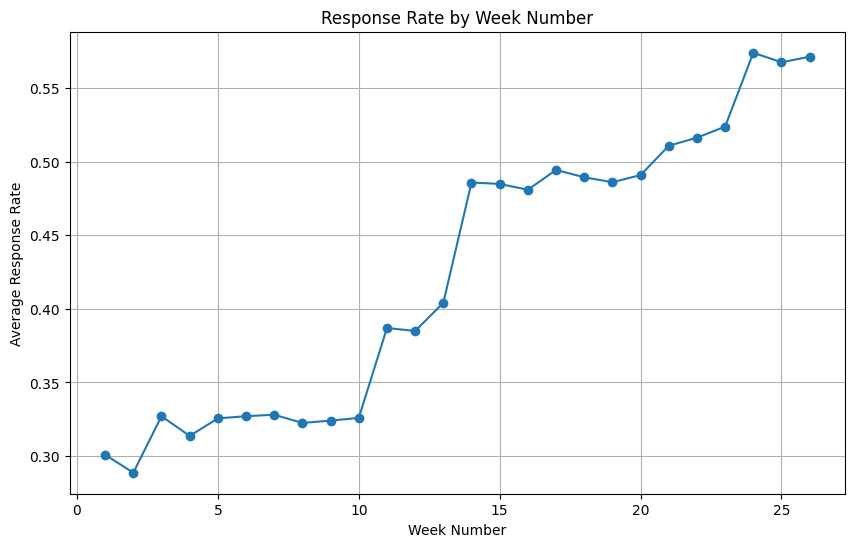

In [ ]:
# Visualization: Response rate by week number
plt.figure(figsize=(10, 6))
data.groupby('week_number')['response'].mean().plot(kind='line', marker='o', title='Response Rate by Week Number')
plt.xlabel('Week Number')
plt.ylabel('Average Response Rate')
plt.grid(True)
plt.show()




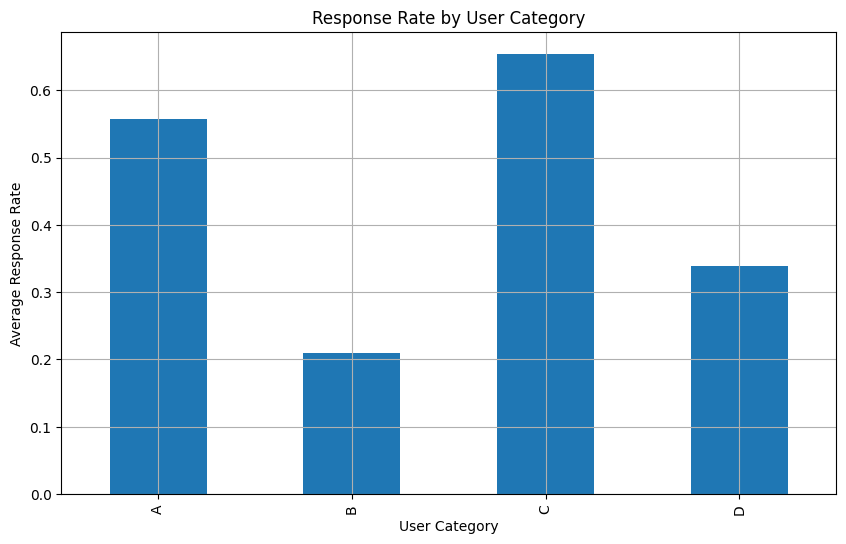

In [3]:
# Visualization: Response rate by user category
plt.figure(figsize=(10, 6))
data.groupby('user_category')['response'].mean().plot(kind='bar', title='Response Rate by User Category')
plt.xlabel('User Category')
plt.ylabel('Average Response Rate')
plt.grid(True)
plt.show()



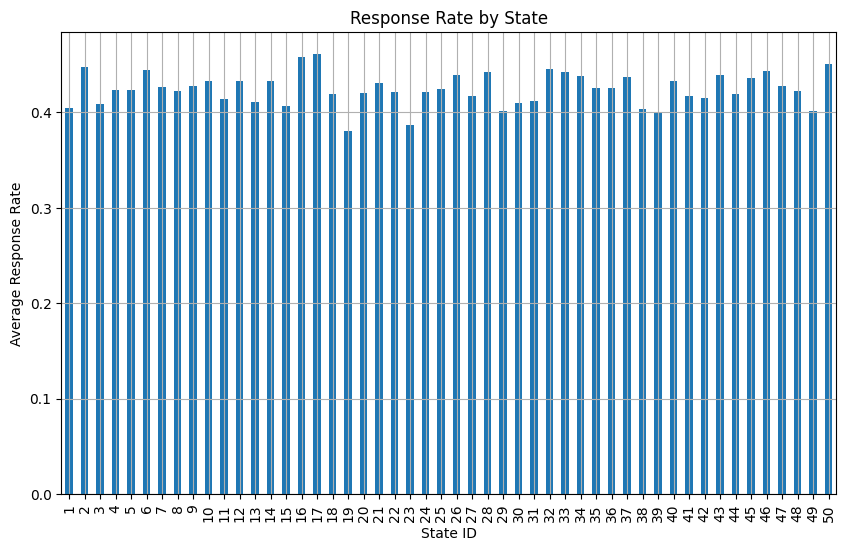

In [ ]:
# Visualization: Response rate by state
plt.figure(figsize=(10, 6))
data.groupby('state_id')['response'].mean().plot(kind='bar', title='Response Rate by State')
plt.xlabel('State ID')
plt.ylabel('Average Response Rate')
plt.grid(True)
plt.show()


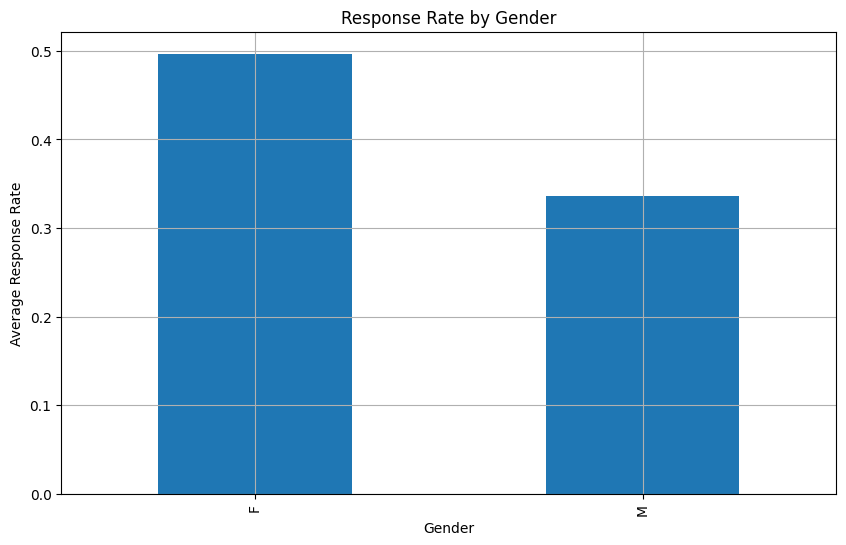

In [4]:

# Visualization: Response rate by gender
plt.figure(figsize=(10, 6))
data.groupby('gender')['response'].mean().plot(kind='bar', title='Response Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Response Rate')
plt.grid(True)
plt.show()

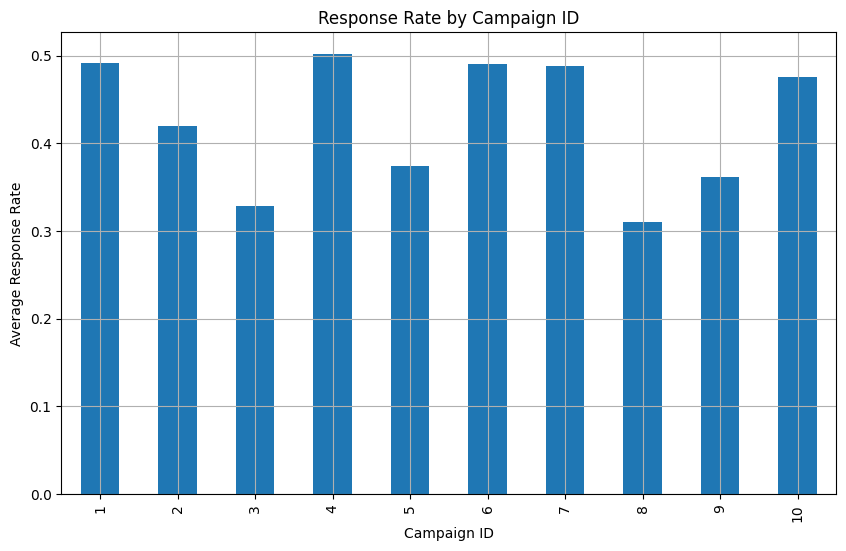

In [5]:
# Visualization: Response rate by campaign ID
plt.figure(figsize=(10, 6))
data.groupby('campaign_id')['response'].mean().plot(kind='bar', title='Response Rate by Campaign ID')
plt.xlabel('Campaign ID')
plt.ylabel('Average Response Rate')
plt.grid(True)
plt.show()


<Figure size 1200x800 with 0 Axes>

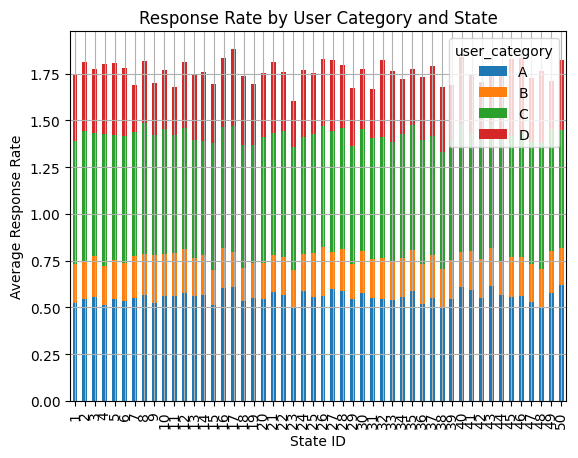

In [6]:

# Visualization: Response rate by user category and state
plt.figure(figsize=(12, 8))
data.pivot_table(index='state_id', columns='user_category', values='response', aggfunc='mean').plot(kind='bar', stacked=True, title='Response Rate by User Category and State')
plt.xlabel('State ID')
plt.ylabel('Average Response Rate')
plt.grid(True)
plt.show()


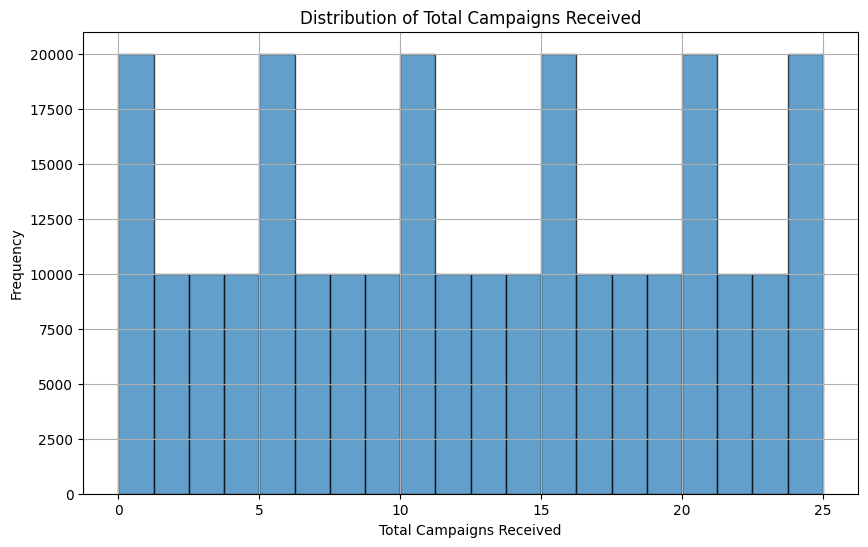

In [7]:

# Visualization: Distribution of total campaigns received
plt.figure(figsize=(10, 6))
data['total_campaigns_received'].hist(bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Total Campaigns Received')
plt.xlabel('Total Campaigns Received')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



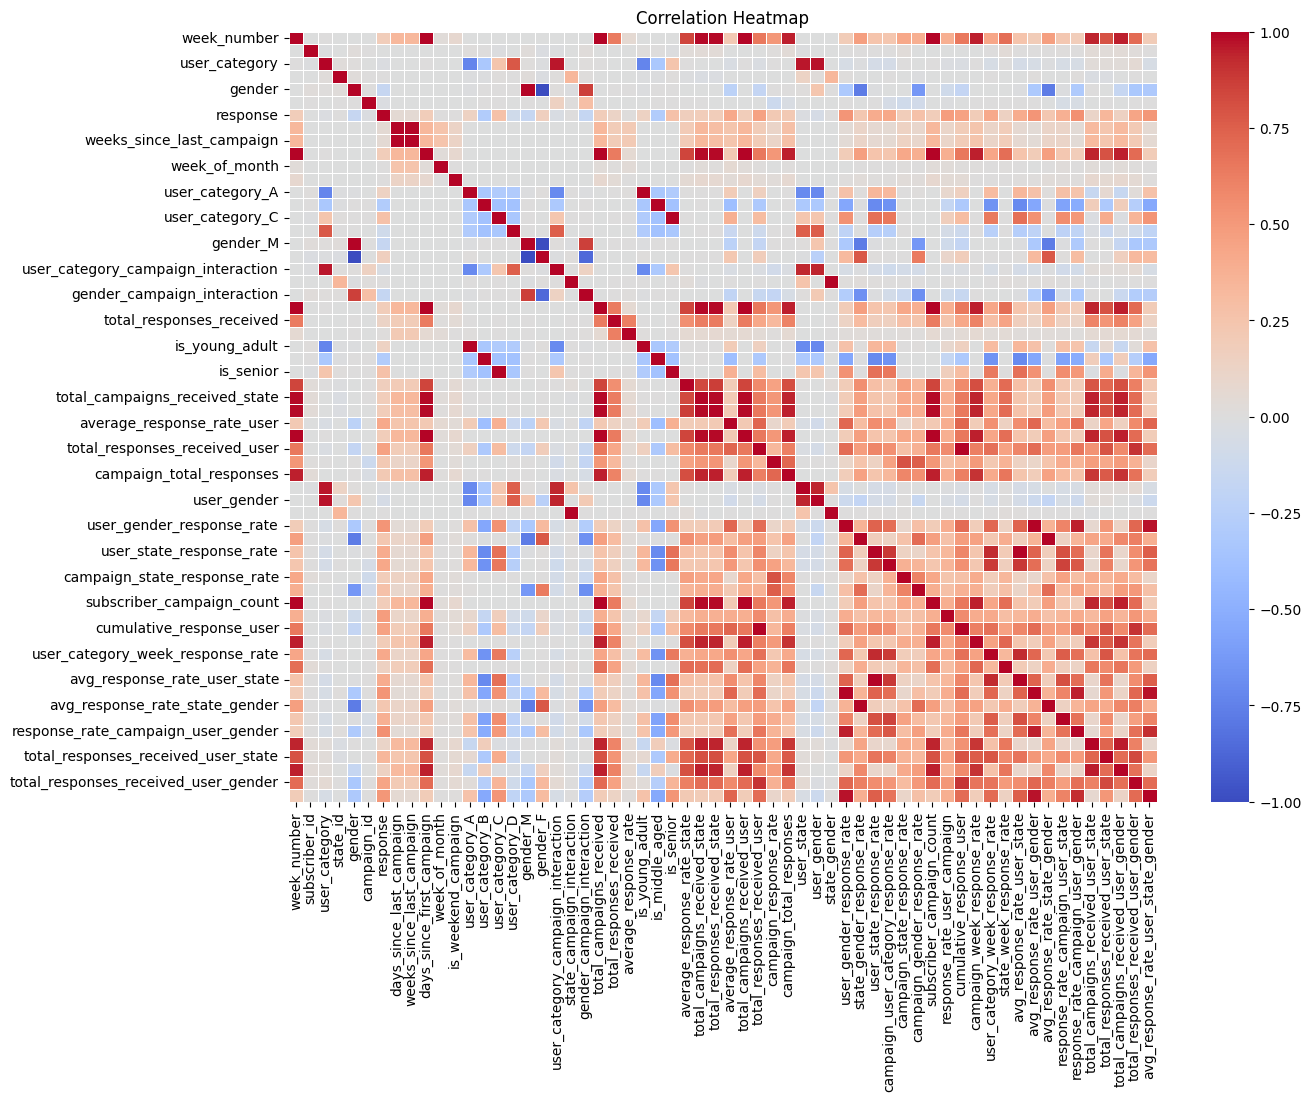

In [8]:
# Visualization: Correlation heatmap
import seaborn as sns

# For the correlation heatmap, convert categorical variables to numeric
data_numeric = data.copy()

# Convert categorical variables to numeric
data_numeric['user_category'] = data_numeric['user_category'].astype('category').cat.codes
data_numeric['gender'] = data_numeric['gender'].astype('category').cat.codes
data_numeric['campaign_id'] = data_numeric['campaign_id'].astype('category').cat.codes
data_numeric['state_id'] = data_numeric['state_id'].astype('category').cat.codes
data_numeric['user_category_campaign_interaction'] = data_numeric['user_category_campaign_interaction'].astype('category').cat.codes
data_numeric['state_campaign_interaction'] = data_numeric['state_campaign_interaction'].astype('category').cat.codes
data_numeric['gender_campaign_interaction'] = data_numeric['gender_campaign_interaction'].astype('category').cat.codes
data_numeric['user_state'] = data_numeric['user_state'].astype('category').cat.codes
data_numeric['user_gender'] = data_numeric['user_gender'].astype('category').cat.codes
data_numeric['state_gender'] = data_numeric['state_gender'].astype('category').cat.codes

# Display correlation heatmap
plt.figure(figsize=(14, 10))
corr = data_numeric.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# plt.figure(figsize=(14, 10))
# corr = data_numeric[selected_features].corr()
# sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Heatmap for Selected Features')
# plt.show()

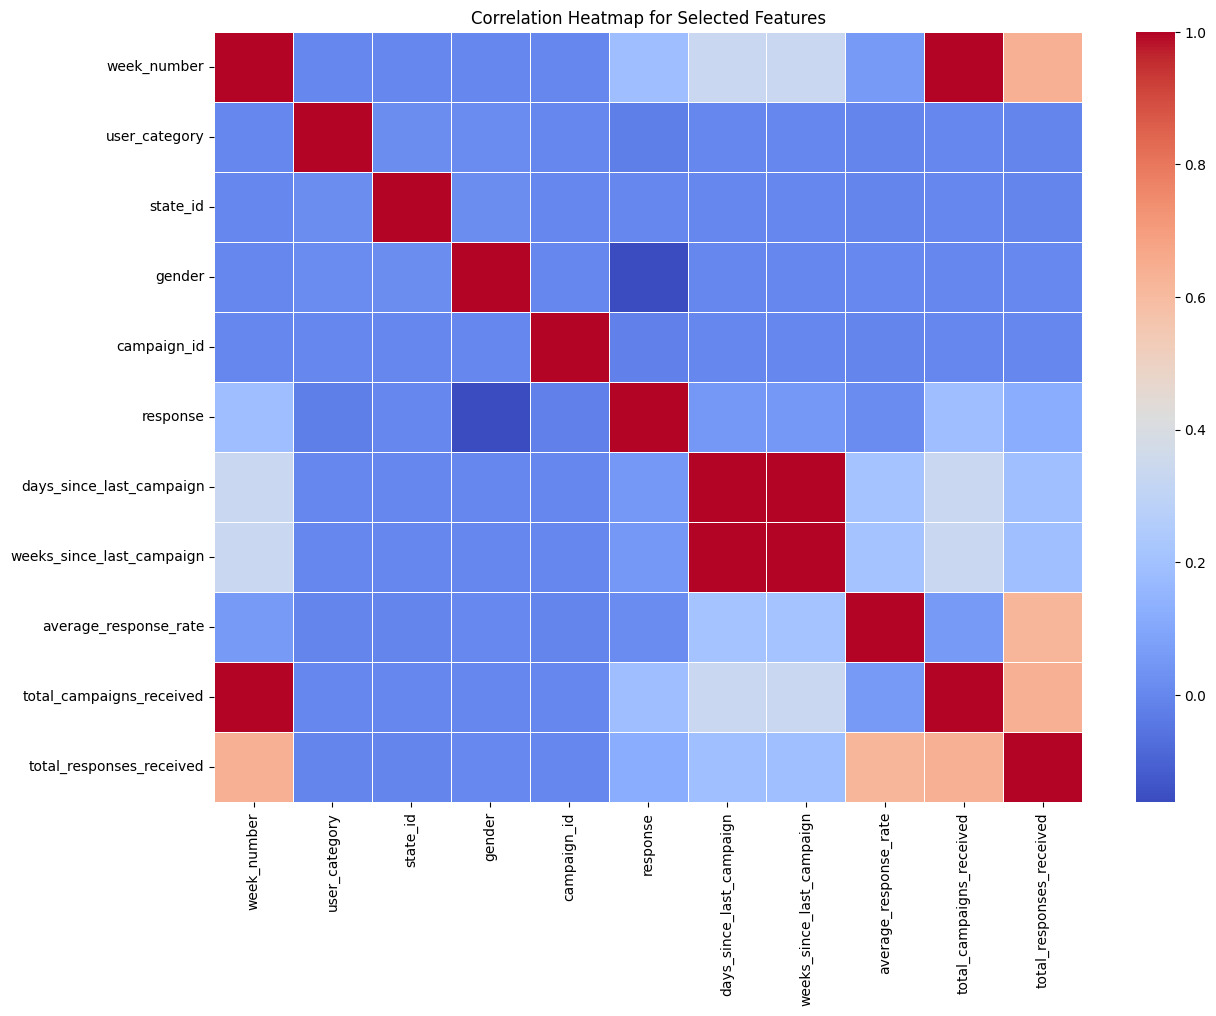

In [9]:
# Select a subset of features for the heatmap
selected_features = [
    'week_number', 'user_category', 'state_id', 'gender', 'campaign_id',
    'response', 'days_since_last_campaign', 'weeks_since_last_campaign',
    'average_response_rate', 'total_campaigns_received', 'total_responses_received'
]


# Create a correlation heatmap for the selected features without annotations
plt.figure(figsize=(14, 10))
corr = data_numeric[selected_features].corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Selected Features')
plt.show()

## Save the features

In [ ]:
data.to_csv('/content/drive/MyDrive/ml_internship/processed_hist.csv', index=False)

In [10]:
# List of all features created
features = [
    'week_number', 'user_category', 'state_id', 'gender', 'days_since_last_campaign', 'weeks_since_last_campaign',
    'days_since_first_campaign', 'week_of_month', 'is_weekend_campaign', 'user_category_A', 'user_category_B',
    'user_category_C', 'user_category_D', 'gender_M', 'gender_F', 'user_category_campaign_interaction',
    'state_campaign_interaction', 'gender_campaign_interaction', 'total_campaigns_received', 'total_responses_received',
    'average_response_rate', 'is_young_adult', 'is_middle_aged', 'is_senior', 'average_response_rate_state',
    'total_campaigns_received_state', 'total_responses_received_state', 'average_response_rate_user',
    'total_campaigns_received_user', 'total_responses_received_user', 'campaign_response_rate', 'campaign_total_responses',
    'user_state', 'user_gender', 'state_gender', 'user_gender_response_rate', 'state_gender_response_rate',
    'user_state_response_rate', 'campaign_user_category_response_rate', 'campaign_state_response_rate',
    'campaign_gender_response_rate', 'subscriber_campaign_count', 'response_rate_user_campaign', 'cumulative_response_user',
    'campaign_week_response_rate', 'user_category_week_response_rate', 'state_week_response_rate',
    'avg_response_rate_user_state', 'avg_response_rate_user_gender', 'avg_response_rate_state_gender',
    'response_rate_campaign_user_state', 'response_rate_campaign_user_gender', 'total_campaigns_received_user_state',
    'total_responses_received_user_state', 'total_campaigns_received_user_gender', 'total_responses_received_user_gender',
    'avg_response_rate_user_state_gender'
]
data[features]

,week_number,user_category,state_id,gender,days_since_last_campaign,weeks_since_last_campaign,days_since_first_campaign,week_of_month,is_weekend_campaign,user_category_A,...,avg_response_rate_user_state,avg_response_rate_user_gender,avg_response_rate_state_gender,response_rate_campaign_user_state,response_rate_campaign_user_gender,total_campaigns_received_user_state,total_responses_received_user_state,total_campaigns_received_user_gender,total_responses_received_user_gender,avg_response_rate_user_state_gender
0,1,B,2,M,0.0,0.0,0,1,False,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.0,1,0.0,0.000000
1,1,A,38,F,0.0,0.0,0,1,False,1,...,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.0,1,0.0,0.000000
2,1,C,46,M,0.0,0.0,0,1,False,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.0,1,0.0,0.000000
3,1,B,35,M,0.0,0.0,0,1,False,0,...,0.000000,1.000000,0.000000,0.000000,0.000000,1,0.0,2,1.0,0.000000
4,1,B,22,M,0.0,0.0,0,1,False,0,...,0.000000,0.500000,0.000000,0.000000,0.000000,1,0.0,3,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259995,26,A,1,M,7.0,1.0,175,2,True,1,...,0.523657,0.710050,0.324503,0.642857,0.750749,1248,653.0,23374,16596.0,0.707911
259996,26,A,10,F,7.0,1.0,175,2,True,1,...,0.561056,0.438483,0.509899,0.623656,0.459130,910,510.0,30212,13247.0,0.421687
259997,26,C,1,M,7.0,1.0,175,2,True,0,...,0.657918,0.584730,0.324783,0.554545,0.485036,1144,752.0,29300,17132.0,0.587669
259998,26,C,27,M,7.0,1.0,175,2,True,0,...,0.647421,0.584744,0.315697,0.750000,0.652749,1300,841.0,29301,17133.0,0.574539


In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis


# Ensure to include all created features
X = data[features].copy()
y = data['response']

# Convert categorical variables to numeric
X.loc[:, 'user_category'] = X['user_category'].astype('category').cat.codes
X.loc[:, 'state_id'] = X['state_id'].astype('category').cat.codes
X.loc[:, 'gender'] = X['gender'].astype('category').cat.codes

# Handle interaction features by encoding them as well
X.loc[:, 'user_category_campaign_interaction'] = X['user_category_campaign_interaction'].astype('category').cat.codes
X.loc[:, 'state_campaign_interaction'] = X['state_campaign_interaction'].astype('category').cat.codes
X.loc[:, 'gender_campaign_interaction'] = X['gender_campaign_interaction'].astype('category').cat.codes
X.loc[:, 'user_state'] = X['user_state'].astype('category').cat.codes
X.loc[:, 'user_gender'] = X['user_gender'].astype('category').cat.codes
X.loc[:, 'state_gender'] = X['state_gender'].astype('category').cat.codes



# Fill any missing values with the median of the column
X.fillna(X.median(), inplace=True)


# Check for infinite values and replace them
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.median(), inplace=True)

# Split the dataset into training and testing sets by subscriber_id
unique_subscribers = data['subscriber_id'].unique()
train_subscribers, test_subscribers = train_test_split(unique_subscribers, test_size=0.2, random_state=42)

train_indices = data['subscriber_id'].isin(train_subscribers)
test_indices = data['subscriber_id'].isin(test_subscribers)

X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




###Random Forest Feature Importance


In [12]:
# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances from the Random Forest model
rf_importances = rf.feature_importances_
rf_feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_importances})
rf_feature_importance.sort_values(by='importance', ascending=False, inplace=True)

###LDA Feature Importance

In [13]:
# Train a Linear Discriminant Analysis model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)

# LDA feature importances are given by the absolute value of the coefficients
lda_importances = np.abs(lda.coef_[0])
lda_feature_importance = pd.DataFrame({'feature': X.columns, 'importance': lda_importances})
lda_feature_importance.sort_values(by='importance', ascending=False, inplace=True)


#QDA Feature Importance


In [14]:
# Train a Quadratic Discriminant Analysis model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_scaled, y_train)

# Get QDA feature importances based on variance ratio
qda_importances = np.var(qda.means_, axis=0)
qda_feature_importance = pd.DataFrame({'feature': X.columns, 'importance': qda_importances})
qda_feature_importance.sort_values(by='importance', ascending=False, inplace=True)


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


### Rank Features Based on Importance Scores

In [15]:
# Combine feature importances
combined_importance = rf_feature_importance.set_index('feature').join(
    lda_feature_importance.set_index('feature'), lsuffix='_rf', rsuffix='_lda').join(
    qda_feature_importance.set_index('feature'), lsuffix='_rf_lda', rsuffix='_qda')

# Compute the average importance
combined_importance['average_importance'] = combined_importance.mean(axis=1)
combined_importance.sort_values(by='average_importance', ascending=False, inplace=True)

# Display the ranked features
combined_importance.reset_index(inplace=True)
combined_importance = combined_importance.rename(columns={'index': 'feature'})

print(combined_importance.to_string(index=False))


                             feature  importance_rf  importance_lda  importance  average_importance
         response_rate_user_campaign       0.098983        1.044556    0.238980            0.460839
  response_rate_campaign_user_gender       0.072930        0.523195    0.300963            0.299030
           user_gender_response_rate       0.050690        0.408227    0.281317            0.246745
       avg_response_rate_user_gender       0.045470        0.408227    0.281317            0.245005
      total_responses_received_state       0.019034        0.443983    0.034953            0.165990
total_responses_received_user_gender       0.029547        0.186237    0.199268            0.138351
      total_campaigns_received_state       0.019120        0.360117    0.034377            0.137871
 avg_response_rate_user_state_gender       0.046934        0.001192    0.268027            0.105384
       campaign_gender_response_rate       0.023688        0.191415    0.076928            0.097344


### Display the cross-validation results


In [16]:
from sklearn.model_selection import train_test_split, cross_val_score

# Cross-validation for Random Forest
rf_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
rf_mean_score = np.mean(rf_scores)

# Cross-validation for LDA
lda_scores = cross_val_score(lda, X_train_scaled, y_train, cv=5, scoring='accuracy')
lda_mean_score = np.mean(lda_scores)

# Cross-validation for QDA
qda_scores = cross_val_score(qda, X_train_scaled, y_train, cv=5, scoring='accuracy')
qda_mean_score = np.mean(qda_scores)

# Display the cross-validation results
results = {
    'Random Forest Mean Accuracy': rf_mean_score,
    'LDA Mean Accuracy': lda_mean_score,
    'QDA Mean Accuracy': qda_mean_score
}

# Print the results
print(pd.DataFrame(results, index=[0]))

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


   Random Forest Mean Accuracy  LDA Mean Accuracy  QDA Mean Accuracy
0                      0.33438           0.680663           0.661385


### Hyperparameter Tuning

In [23]:
from sklearn.model_selection import GridSearchCV

# Define a minimal parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100],    # Single option
    'max_depth': [10],        # Single option
    'min_samples_split': [2], # Single option
    'min_samples_leaf': [1],  # Single option
    'bootstrap': [True]       # Single option
}

# Perform Grid Search for Random Forest with minimal parameters and reduced CV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=2, n_jobs=1, verbose=1, pre_dispatch='1*n_jobs')
grid_search_rf.fit(X_train[:100], y_train[:100])  # Use a subset of the data

# Get the best parameters and the best model
best_rf = grid_search_rf.best_estimator_
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")

# Define a minimal parameter grid for LDA
param_grid_lda = {
    'solver': ['svd']  # Single option
}

# Perform Grid Search for LDA with minimal parameters and reduced CV
grid_search_lda = GridSearchCV(estimator=lda, param_grid=param_grid_lda, cv=2, n_jobs=1, verbose=1, pre_dispatch='1*n_jobs')
grid_search_lda.fit(X_train_scaled[:100], y_train[:100])  # Use a subset of the data

# Get the best parameters and the best model
best_lda = grid_search_lda.best_estimator_
print(f"Best parameters for LDA: {grid_search_lda.best_params_}")

# Define a minimal parameter grid for QDA
param_grid_qda = {
    'reg_param': [0.0]  # Single option
}

# Perform Grid Search for QDA with minimal parameters and reduced CV
grid_search_qda = GridSearchCV(estimator=qda, param_grid=param_grid_qda, cv=2, n_jobs=1, verbose=1, pre_dispatch='1*n_jobs')
grid_search_qda.fit(X_train_scaled[:100], y_train[:100])  # Use a subset of the data

# Get the best parameters and the best model
best_qda = grid_search_qda.best_estimator_
print(f"Best parameters for QDA: {grid_search_qda.best_params_}")


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Best parameters for Random Forest: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Best parameters for LDA: {'solver': 'svd'}
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Best parameters for QDA: {'reg_param': 0.0}


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


### Final Model Training and Prediction

In [25]:
# Train the best Random Forest model on the entire training set
best_rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = best_rf.predict(X_test)
y_pred_proba_rf = best_rf.predict_proba(X_test)[:, 1]

test_data = data[data['week_number'] == 27].copy()


# Select the top 25% subscribers with the highest predicted response probabilities
test_data['predicted_response_prob'] = y_pred_proba_rf
top_25_percent_rf = test_data.nlargest(int(len(test_data) * 0.25), 'predicted_response_prob')

# Display the selected subscribers and their predicted campaigns
selected_subscribers_rf = top_25_percent_rf[['subscriber_id', 'predicted_response_prob']]
print(selected_subscribers_rf)

# Calculate the expected response rate
expected_response_rate_rf = top_25_percent_rf['response'].mean()
print(f"Expected response rate: {expected_response_rate_rf}")

# Repeat the process for the best LDA and QDA models
best_lda.fit(X_train_scaled, y_train)
y_pred_lda = best_lda.predict(X_test_scaled)
y_pred_proba_lda = best_lda.predict_proba(X_test_scaled)[:, 1]

test_data['predicted_response_prob_lda'] = y_pred_proba_lda
top_25_percent_lda = test_data.nlargest(int(len(test_data) * 0.25), 'predicted_response_prob_lda')
selected_subscribers_lda = top_25_percent_lda[['subscriber_id', 'predicted_response_prob_lda']]
print(selected_subscribers_lda)
expected_response_rate_lda = top_25_percent_lda['response'].mean()
print(f"Expected response rate (LDA): {expected_response_rate_lda}")

best_qda.fit(X_train_scaled, y_train)
y_pred_qda = best_qda.predict(X_test_scaled)
y_pred_proba_qda = best_qda.predict_proba(X_test_scaled)[:, 1]

test_data['predicted_response_prob_qda'] = y_pred_proba_qda
top_25_percent_qda = test_data.nlargest(int(len(test_data) * 0.25), 'predicted_response_prob_qda')
selected_subscribers_qda = top_25_percent_qda[['subscriber_id', 'predicted_response_prob_qda']]
print(selected_subscribers_qda)
expected_response_rate_qda = top_25_percent_qda['response'].mean()
print(f"Expected response rate (QDA): {expected_response_rate_qda}")


       subscriber_id  predicted_response_prob
50370            NaN                 0.995676
51353            NaN                 0.994977
51476            NaN                 0.994767
50373            NaN                 0.994614
47329            NaN                 0.994405
...              ...                      ...
13481            NaN                 0.594095
5998             NaN                 0.594094
11481            NaN                 0.594075
28128            NaN                 0.594066
29057            NaN                 0.594063

[13000 rows x 2 columns]
Expected response rate: nan
       subscriber_id  predicted_response_prob_lda
48800            NaN                     0.987849
49770            NaN                     0.987576
49259            NaN                     0.987348
49635            NaN                     0.987305
49147            NaN                     0.987211
...              ...                          ...
21982            NaN                     0.6

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


       subscriber_id  predicted_response_prob_qda
2                NaN                          1.0
4                NaN                          1.0
5                NaN                          1.0
7                NaN                          1.0
12               NaN                          1.0
...              ...                          ...
38973            NaN                          1.0
36292            NaN                          1.0
37842            NaN                          1.0
36491            NaN                          1.0
26231            NaN                          1.0

[13000 rows x 2 columns]
Expected response rate (QDA): nan


### Campaign Assignment

### Evaluation on Test Set

In [27]:
# Evaluate the final model's performance on the test set
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Random Forest Evaluation
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

print(f"Random Forest - Accuracy: {rf_accuracy}, Precision: {rf_precision}, Recall: {rf_recall}, F1 Score: {rf_f1}")

# LDA Evaluation
lda_accuracy = accuracy_score(y_test, y_pred_lda)
lda_precision = precision_score(y_test, y_pred_lda)
lda_recall = recall_score(y_test, y_pred_lda)
lda_f1 = f1_score(y_test, y_pred_lda)

print(f"LDA - Accuracy: {lda_accuracy}, Precision: {lda_precision}, Recall: {lda_recall}, F1 Score: {lda_f1}")

# QDA Evaluation
qda_accuracy = accuracy_score(y_test, y_pred_qda)
qda_precision = precision_score(y_test, y_pred_qda)
qda_recall = recall_score(y_test, y_pred_qda)
qda_f1 = f1_score(y_test, y_pred_qda)

print(f"QDA - Accuracy: {qda_accuracy}, Precision: {qda_precision}, Recall: {qda_recall}, F1 Score: {qda_f1}")


Random Forest - Accuracy: 0.7662692307692308, Precision: 0.759586476079962, Recall: 0.6546801836614083, F1 Score: 0.7032425041507959
LDA - Accuracy: 0.7646346153846154, Precision: 0.7704245649041126, Recall: 0.6319043505932627, F1 Score: 0.6943230350408351
QDA - Accuracy: 0.6774615384615384, Precision: 0.5863094254848195, Recall: 0.8067918352502614, F1 Score: 0.6791030497837983
